<a href="https://colab.research.google.com/github/homosapienssapiens/feature-engineering/blob/main/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto final - Ingeniería de características
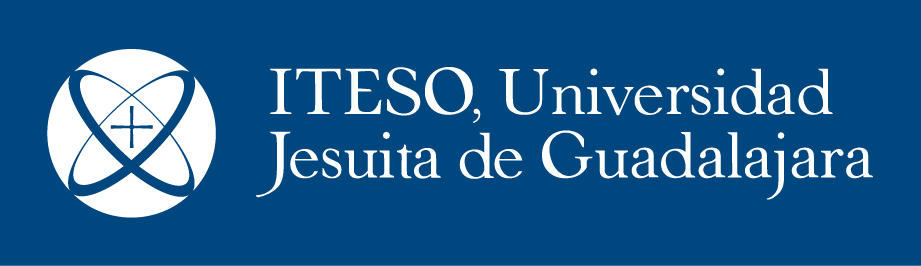  
Miguel Angel Solis Orozco  
Ingeniería de características  
Instituto de Estudios Superiores de Occidente  
Prof: Dr. Carlos Augusto Arellano Muro

---



##1. Separe las variables x1 y x2 en columnas diferentes.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
route = "/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Trabajo final/"
df = pd.read_csv(route + "data-1.csv")

In [3]:
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,27/12/2014,-13.30
6567,x2,28/12/2014,16.20
6568,x2,29/12/2014,5.10
6569,x2,30/12/2014,4.90


Analizando el DataFrame podemos ver que las fechas no se encuentran en el formato fecha correcto. A continuación pondremos el formato a date time.

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,2014-12-27,-13.30
6567,x2,2014-12-28,16.20
6568,x2,2014-12-29,5.10
6569,x2,2014-12-30,4.90


Creación de nuevo data frame con separación de la columna 'dato' en las columnas 'x1' y 'x2' dependiendo del valor de la columna 'nombre'.

In [5]:
dfsplit = pd.DataFrame(columns = ['Date', 'x1', 'x2'])
x1 = float('NaN')
x2 = float('NaN')
mydates = pd.date_range(min(df['Fecha']), max(df['Fecha'])).tolist()
for i in mydates:
  for j in df.index:
    if df.loc[j, 'Fecha'] == i:
      fecha = df.loc[j, 'Fecha']
      if df.loc[j, 'nombre'] == 'x1': 
        x1 = df.loc[j, 'data']
      else:
        x2 = df.loc[j, 'data']
  row = {'Date': fecha,
    'x1': x1,
    'x2': x2}
  dfsplit = dfsplit.append(row, ignore_index = True)
  x1 = float('NaN')
  x2 = float('NaN')
dfsplit

,Date,x1,x2
0,2006-01-01,6.05,9.22
1,2006-01-02,4.72,1.14
2,2006-01-03,4.46,-13.46
3,2006-01-04,34.74,3.33
4,2006-01-05,1.91,-0.14
...,...,...,...
3282,2014-12-27,13.16,-13.30
3283,2014-12-28,8.50,16.20
3284,2014-12-29,11.03,5.10
3285,2014-12-30,21.33,4.90


##2. Elija y justifique un método de imputación de datos para los datos perdidos y los datos menores o iguales que cero.

Veamos primero la forma de las series de tiempo por pura curiosidad.

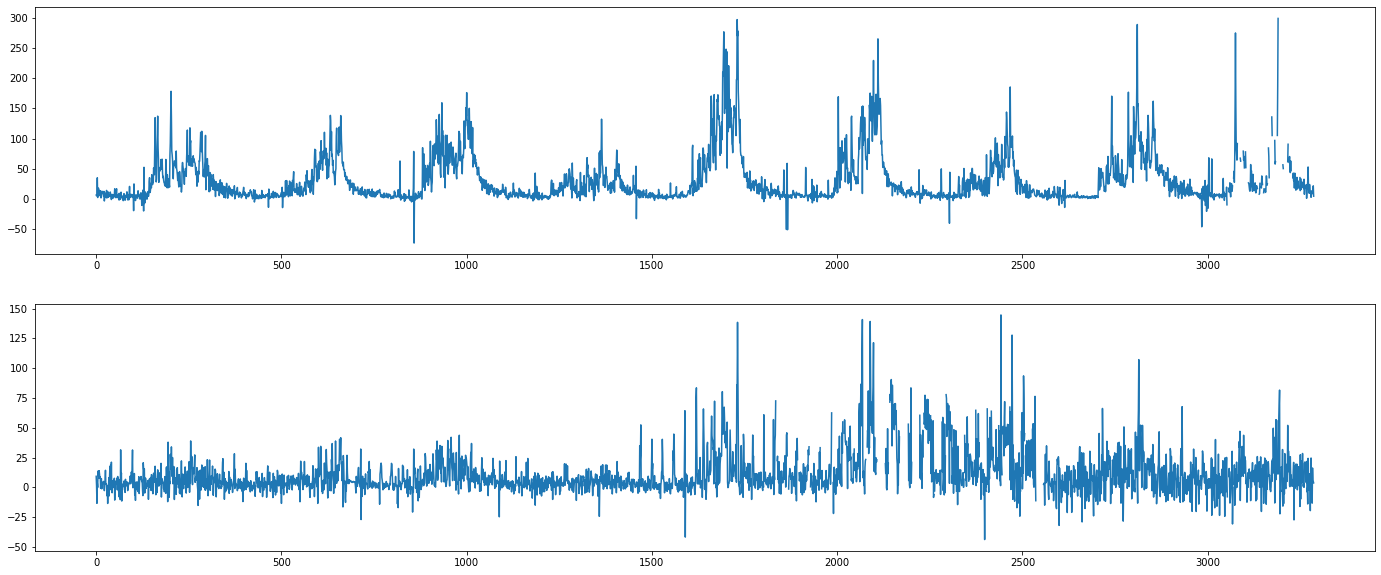

In [16]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dfsplit['x1'])
plt.subplot(2, 1, 2)
plt.plot(dfsplit['x2'])

In [32]:
dfsplit.describe()

,x1,x2
count,3202.000000,3160.000000
mean,30.882717,10.930712
std,39.399464,17.848627
min,-73.790000,-43.890000
25%,5.642500,1.397500
50%,15.140000,6.000000
75%,42.375000,14.912500
max,299.740000,144.700000


###Valores NaN  
He decidido reemplazar los valores NaN con el promedio de cada serie, pues es imposible saber cuál es su valor real. Puede ser alto o bajo, pero nunca sabremos con exactitud.

In [38]:
#Cantidadd de valorres NaN antes del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dfsplit['x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dfsplit['x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 85
La cantidad de valores NaN en x2 es: 127


In [40]:
#Promedios de x1 y x2.
meanx1 = dfsplit['x1'].mean()
meanx2 = dfsplit['x2'].mean()
print('El promedio de x1 es: ' + str(round(meanx1, 2)))
print('El promedio de x2 es: ' + str(round(meanx2, 2)))

El promedio de x1 es: 30.88
El promedio de x2 es: 10.93


In [41]:
#Llenado de valores NaN de x1 y x2 con su promedio.
dfsplit['x1'] = dfsplit['x1'].fillna(meanx1)
dfsplit['x2'] = dfsplit['x2'].fillna(meanx2)

In [42]:
#Cantidadd de valorres NaN después del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dfsplit['x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dfsplit['x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 0
La cantidad de valores NaN en x2 es: 0


###Valores iguales o menores a cero.  
He decidido reemplazar estos valores por 0.000000001, pues agrandar más estos valores, alteraría todavía más nuestra serie y se perdería más su distribución real.

In [46]:
#Cantidad de valores igual o menor a cero en x1 y x2 antes del reemplazo.
print('La cantidad de valores igual o mayores a 0 para x1 es: ' + str(sum(dfsplit['x1'] <= 0)))
print('La cantidad de valores igual o mayores a 0 para x2 es: ' + str(sum(dfsplit['x2'] <= 0)))

La cantidad de valores igual o mayores a 0 para x1 es: 97
La cantidad de valores igual o mayores a 0 para x2 es: 590


In [47]:
#Reemplazo de valores igual o menores a cero en x1 y x2.
dfsplit['x1'] = dfsplit['x1'].clip(lower = 0.000000001)
dfsplit['x2'] = dfsplit['x2'].clip(lower = 0.000000001)

In [48]:
#Cantidad de valores igual o menor a cero en x1 y x2 después del reemplazo.
print('La cantidad de valores igual o mayores a 0 para x1 es: ' + str(sum(dfsplit['x1'] <= 0)))
print('La cantidad de valores igual o mayores a 0 para x2 es: ' + str(sum(dfsplit['x2'] <= 0)))

La cantidad de valores igual o mayores a 0 para x1 es: 0
La cantidad de valores igual o mayores a 0 para x2 es: 0


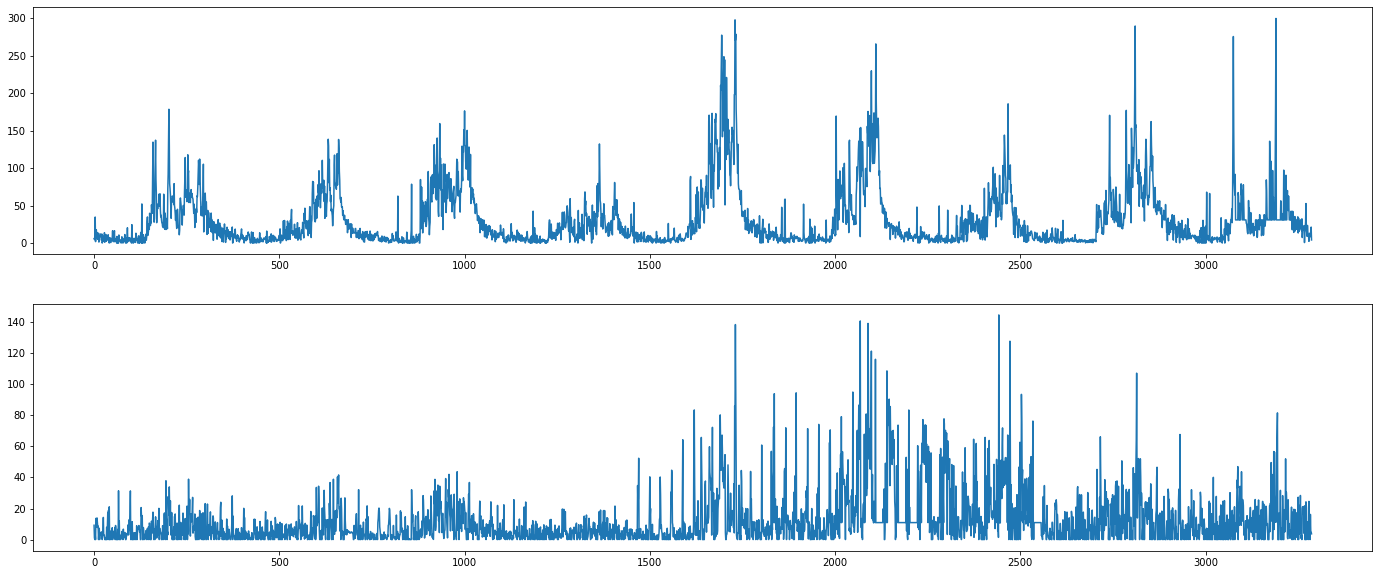

In [49]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dfsplit['x1'])
plt.subplot(2, 1, 2)
plt.plot(dfsplit['x2'])

Los datos han alterado su distribución, pero ya cumplimos con los requerimientos solicitados en el paso 2.